In [1]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('annual_aqi_by_cbsa_2017_with_LL.csv')
df = df.drop([0, 1, 2, 3, 4, 5, 6]).reset_index(drop=True)
df = df.dropna()

In [3]:
df['not_healthy_days'] = df['HazardousDays'] + df['VeryUnhealthyDays'] + df['UnhealthyDays']

In [4]:
#df['at_least_one_unhealthy_day'] = np.where(df['not_healthy_days']>=1, 1, 0)

In [5]:
df

,CBSAName,Latitude,Longitude,HazardousDays,VeryUnhealthyDays,UnhealthyDays,not_healthy_days
0,"Guayama, PR",17.967309,-66.186149,0,0,0,0
1,"Coco, PR",17.984438,-66.289628,0,0,0,0
2,"Ponce, PR",18.009558,-66.627249,0,1,0,1
3,"Adjuntas, PR",18.175378,-66.725988,0,0,0,0
4,"Kahului-Wailuku-Lahaina, HI",20.758500,-156.247890,0,0,0,0
5,"Urban Honolulu, HI",21.390861,-157.965250,0,0,0,0
6,"Kapaa, HI",21.949599,-159.366240,0,0,0,0
7,"McAllen-Edinburg-Mission, TX",26.131081,-97.937265,0,0,0,0
8,"Brownsville-Harlingen, TX",26.135000,-97.633333,0,0,0,0
9,"Naples-Immokalee-Marco Island, FL",26.270083,-81.710959,0,0,0,0


In [6]:
from sklearn import neighbors

# Build our model.
knn = neighbors.KNeighborsRegressor(n_neighbors=3)
x = df[['Latitude', 'Longitude']]
y = df.not_healthy_days
knn.fit(x, y)




KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=3, p=2,
          weights='uniform')

In [7]:
knn.predict([[35, -120]])

array([7.33333333])

Coefficients: 
 [-0.20372147 -0.19167994]
Intercept: 
 -8.289582599903808


ValueError: x and y must be the same size

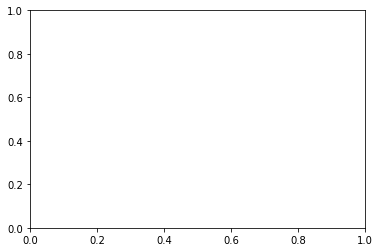

In [9]:
from sklearn import linear_model

# Instantiate our model.
regr = linear_model.LinearRegression()

# Fit our model to our data.
regr.fit(x, y)

# Display the attributes we calculated.
print('Coefficients: \n', regr.coef_)
print('Intercept: \n', regr.intercept_)

# Plot outputs
plt.scatter(x, y, color='black')
plt.plot(x, regr.predict(x), color='blue', linewidth=3)
plt.show()